# Number Theory for Neural Network Weights Initialization

In [187]:
# import dependencies
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Define Fractional Decay Constant

We define $\varsigma$ (varsigma) as the sum of $n$ unit fractions $\frac{1}{x}$ to the power of $x$, whereas $n$ markes the depth of fractions from zero to infinity and $x$ represents the amount of uniform splits of one among the width of units:

$
\varsigma(x) := \sum_{n=0}^{\infty} (\frac{1}{x})^{x^n}
$

whereas $\frac{1}{\varsigma(x)}$ represents the inverse decay constant for a given $x$ towards infinity.

In [188]:
def varsigma(x, n=8):
    '''Compute the decay constant.
    
    Arguments:
        x: defines the base for the computation
        n: defiens the precision due to multiple iterations
    '''
    sum = 0.
    for i in range(n):
        sum += np.power(1./x, np.power(x, i))
    return sum

def inverse_varsigma(x):
    return 1/varsigma(x)

In [189]:
def print_results(bases, results):
    for (b, r) in zip(bases, results):
        print('x {} => varsigma(x) {}'.format(b, r))

In [190]:
min_range = 0.00001
max_range = 30
steps = 10000

# compute experiment results from min to max range with defined stepsize
base_list = np.linspace(min_range, max_range, steps, endpoint=True)
base_inverse_list = []
base_result = []

for b in base_list:
    base_inverse_list.append(1./b)
    base_result.append(varsigma(b))

#print_results(base_list, base_result)

In [191]:
# further variable to plot for visualizing and analysis
f1_over_e_power_x_result = []
f1_over_x_result = []
for b in base_list:
    # plot 1/x
    f1_over_x_result.append(1/b)
    # plot 1/e^x
    f1_over_e_power_x_result.append(1/(np.e**b))

# set pi constant for plot
pi_list = np.full((steps), np.pi)
# set e constant for plot
exp_list = np.full((steps), np.e)
# set sqrt(2) for plot
sqrt_2_list = np.full((steps), np.sqrt(2))

### Compute the area below the curve

In [192]:
def f_x_base_integral(x0, xn, steps):
    sum = 0.
    double_precision_step = steps*100
    width = (xn-x0)/double_precision_step
    x_cur = x0
    for s in range(double_precision_step):
        height = varsigma(x_cur)
        sum += (width*height)
        x_cur += width
    return sum

In [193]:
f_x_base_area = f_x_base_integral(min_range, max_range, steps)
f_x_base_area_list = np.full((steps), f_x_base_area)
f_x_base_area

27.047224860884615

In [194]:
def f_x_integral(x0, xn):
    return np.log(xn)-np.log(x0)

In [195]:
f_x_area = f_x_integral(min_range, max_range)
f_x_area

14.914122846632385

In [196]:
(f_x_base_area - f_x_area)

12.133102014252231

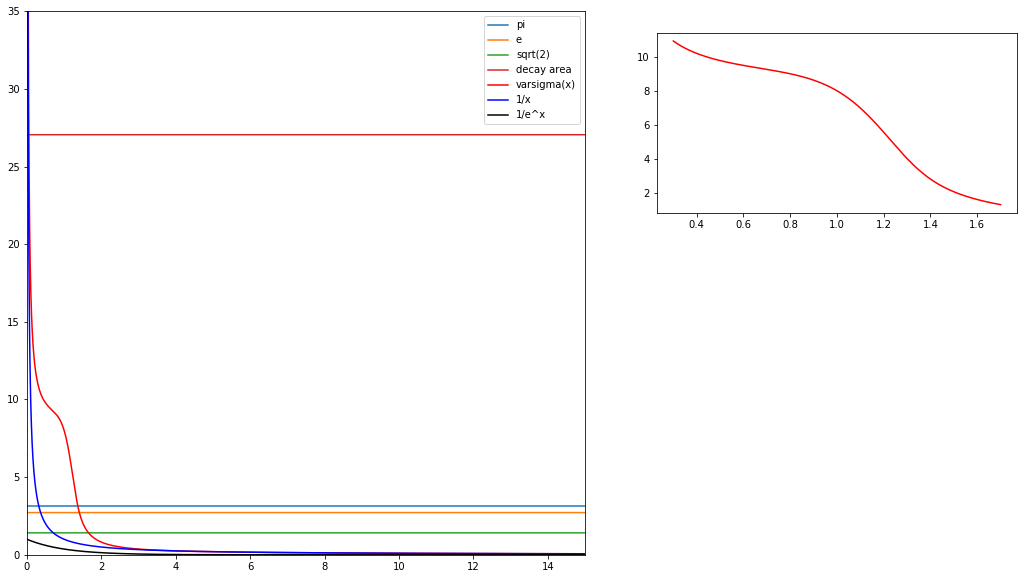

In [197]:
plt.figure(figsize=(10,10))

plt.plot(base_list, pi_list, label="pi")
plt.plot(base_list, exp_list, label="e")
plt.plot(base_list, sqrt_2_list, label="sqrt(2)")

plt.plot(base_list, f_x_base_area_list, label="decay area")
plt.plot(base_list, base_result, c='r', label="varsigma(x)")
plt.plot(base_list, f1_over_x_result, c='b', label="1/x")
plt.plot(base_list, f1_over_e_power_x_result, c='k', label="1/e^x")
plt.legend()
plt.xlim(0, 15)
plt.ylim(0, 35)

X_detail = np.linspace(0.3, 1.7, 1000)
Y_detail = varsigma(X_detail)
 # location for the zoomed portion 
sub_axes = plt.axes([1, .6, .5, .25]) 
# plot the zoomed portion
sub_axes.plot(X_detail, Y_detail, c='r')

plt.show()

### Possible Correlation with $\pi$ and $e$?

The area below the decay constants is approx.:

$\pi^{2}*e$

If we could compute the area with higher precision maybe we find a relationship between the decay area and the natural constants?

In [198]:
np.pi**2 * np.e

26.828366297560617

### Compute the Gradient of the curve at the anomaly

In [199]:
def gradient(x, h):
    return (varsigma(x + h)-varsigma(x))/h

In [200]:
h = 0.0000001
base_list_range = np.linspace(0.4, 1, 10000, endpoint=True)
base_list_result_range = []
base_list_gradients = []
for x in base_list_range:
    base_list_result_range.append(varsigma(x))
    base_list_gradients.append(gradient(x, h))
    
min_gradient = np.argmax(base_list_gradients)
min_gradient_base = base_list_range[min_gradient]
print('index {}, x {}, gradient {}'.format(min_gradient, base_list_range[min_gradient], base_list_gradients[min_gradient]))

index 4524, x 0.6714671467146714, gradient -2.2962650980673516


In [201]:
def print_gradients():
    for i in range(len(base_list_range)):
        print('index {}, range {}, gradient {}'.format(i, base_list_result_range[i], base_list_gradients[i]))
#print_gradients()

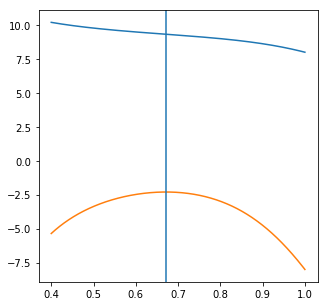

In [202]:
plt.figure(figsize=(5,5))

plt.plot(base_list_range, base_list_result_range)
plt.plot(base_list_range, base_list_gradients)
plt.axvline(x=min_gradient_base)

plt.show()

### Decay Anomaly Analysis for Neural Networks

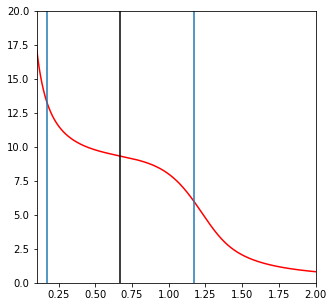

In [346]:
plt.figure(figsize=(5,5))

plt.plot(base_list, base_result, c='r')

plt.axvline(x=min_gradient_base, c='k')
plt.axvline(x=min_gradient_base-0.5)
plt.axvline(x=min_gradient_base+0.5)

plt.xlim((0.1, 2))
plt.ylim((0, 20))

plt.show()

The plot shows that arround ~0.6714 the gradient is very low and as shown in the computation the decay constant behaves non-exponential, which could allow us to use weights initialization and activation normalization arround this point to stabalize the output values of the neural network layers.

### Decay Anomaly Shift

We can see that when applying extremly low values and extremely high values to $varsigma(x)$ the inverse operation results nearly to its identity value $x$ only shifted.
And if we use the values surrounding the global optima of the gradient at the anomaly, we receive shiftet entries with respect to the decay constant.

In [204]:
def print_decay_of_x(x):
    print('varsigma({}) = {}'.format(x, varsigma(x)))
    print('inverse varsigma({}) = {}'.format(x, inverse_varsigma(x)))

print('Low values:')
print_decay_of_x(0.0007)
print_decay_of_x(0.001)
print_decay_of_x(0.003)
print_decay_of_x(0.02)
print_decay_of_x(0.07)

print('\nNumbers near local minimum of the gradient:')
print_decay_of_x(min_gradient_base-0.1)
print_decay_of_x(min_gradient_base)
print_decay_of_x(min_gradient_base+0.1)

print('\nHigh values:')
print_decay_of_x(1.5)
print_decay_of_x(2)
print_decay_of_x(10)
print_decay_of_x(30)


Low values:
varsigma(0.0007) = 1435.5765301857257
inverse varsigma(0.0007) = 0.000696584249584121
varsigma(0.001) = 1007.0069385835457
inverse varsigma(0.001) = 0.0009930418169775458
varsigma(0.003) = 340.35096594693664
inverse varsigma(0.003) = 0.0029381435637115478
varsigma(0.02) = 57.082980626326744
inverse varsigma(0.02) = 0.017518356417758583
varsigma(0.07) = 21.50441189462851
inverse varsigma(0.07) = 0.046502085474366565

Numbers near local minimum of the gradient:
varsigma(0.5714671467146715) = 9.564317000586872
inverse varsigma(0.5714671467146715) = 0.10455529651920147
varsigma(0.6714671467146714) = 9.32294797251297
inverse varsigma(0.6714671467146714) = 0.1072622096517453
varsigma(0.7714671467146714) = 9.08039783903676
inverse varsigma(0.7714671467146714) = 0.11012733337530496

High values:
varsigma(1.5) = 2.05234607870611
inverse varsigma(1.5) = 0.48724725833298266
varsigma(2) = 0.8164215090218931
inverse varsigma(2) = 1.2248574896048996
varsigma(10) = 0.1000000001
inverse va

If we plot the values with respect to the decay rate, we can see, that the extrema values such as approx. below 0.3 behave as identity values and approx. above 1.5 as the shifted identity value.

This means that extremly large and small values can be reversed computing the inversed decay constant:

$x \approx \frac{1}{\varsigma(x)}$

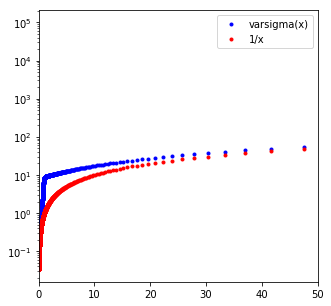

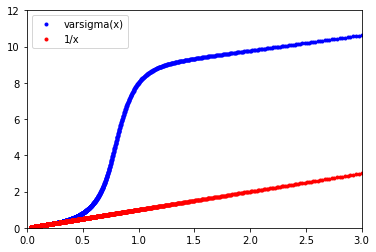

In [205]:
plt.figure(figsize=(5,5))

plt.plot(base_inverse_list, base_result, 'b.', label="varsigma(x)")
plt.plot(base_inverse_list, base_inverse_list, 'r.', label="1/x")
plt.yscale('log')
plt.xlim(0, 50)
plt.legend()

plt.show()

plt.plot(base_inverse_list, base_result, 'b.', label="varsigma(x)")
plt.plot(base_inverse_list, base_inverse_list, 'r.', label="1/x")

plt.ylim(0, 12)
plt.xlim(0, 3)
plt.legend()

plt.show()

## Neural Network

In [206]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [207]:
mnist = input_data.read_data_sets('MINIST_data', validation_size=0)

Extracting MINIST_data\train-images-idx3-ubyte.gz
Extracting MINIST_data\train-labels-idx1-ubyte.gz
Extracting MINIST_data\t10k-images-idx3-ubyte.gz
Extracting MINIST_data\t10k-labels-idx1-ubyte.gz


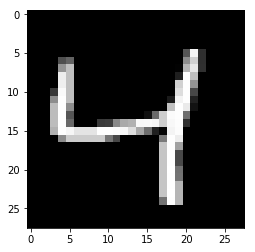

In [208]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

In [340]:
def fc(x, dim, name='fc'):
    with tf.name_scope(name):
        x_shape = x.get_shape().as_list()
        stddev = 2 / np.sqrt(x_shape[1])
        w_init = tf.truncated_normal([x_shape[1], dim], stddev=stddev)
        W = tf.Variable(w_init, name="W")
        b = tf.Variable(tf.zeros([dim]), name="b")
        logits = tf.nn.bias_add(tf.matmul(x, W), b)
        return logits
    
def fc_act(x, dim, name='fc_relu'):
    with tf.name_scope(name):
        act = tf.nn.relu(fc(x, dim, name=name))
        return act
    
def fc_act_amp(x, dim, name='fc_relu_amp'):
    with tf.name_scope(name):
        x = tf.nn.relu(fc(x, dim, name=name))
        condition = tf.less(tf.abs(x-min_gradient_base), 0.5)
        x = tf.where(condition, (x + varsigma(x)), x)
        return x

In [341]:
inputs_ = tf.placeholder(tf.float32, shape=(None, 784))
targets_ = tf.placeholder(tf.float32, shape=(None, 784))

fc1 = fc_act(inputs_, 128, name='fc1')
fc2 = fc_act_amp(fc1, 64, name='fc2')

logits = fc(fc2, 784, name='fc_out')
decoded = tf.nn.sigmoid(logits)

with tf.name_scope('loss'):
    loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
    cost = tf.reduce_mean(loss)
    
with tf.name_scope('optimizer'):
    opt = tf.train.AdamOptimizer().minimize(cost)

In [342]:
sess = tf.Session()

In [343]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 4.4944
Epoch: 1/20... Training loss: 4.5014
Epoch: 1/20... Training loss: 4.3260
Epoch: 1/20... Training loss: 4.1757
Epoch: 1/20... Training loss: 3.9163
Epoch: 1/20... Training loss: 3.6048
Epoch: 1/20... Training loss: 3.3420
Epoch: 1/20... Training loss: 3.1302
Epoch: 1/20... Training loss: 2.8738
Epoch: 1/20... Training loss: 2.6510
Epoch: 1/20... Training loss: 2.4635
Epoch: 1/20... Training loss: 2.3025
Epoch: 1/20... Training loss: 2.0682
Epoch: 1/20... Training loss: 1.9482
Epoch: 1/20... Training loss: 1.8635
Epoch: 1/20... Training loss: 1.7676
Epoch: 1/20... Training loss: 1.6855
Epoch: 1/20... Training loss: 1.6036
Epoch: 1/20... Training loss: 1.5688
Epoch: 1/20... Training loss: 1.4747
Epoch: 1/20... Training loss: 1.4424
Epoch: 1/20... Training loss: 1.3933
Epoch: 1/20... Training loss: 1.2987
Epoch: 1/20... Training loss: 1.2458
Epoch: 1/20... Training loss: 1.1796
Epoch: 1/20... Training loss: 1.1012
Epoch: 1/20... Training loss: 1.0526
E

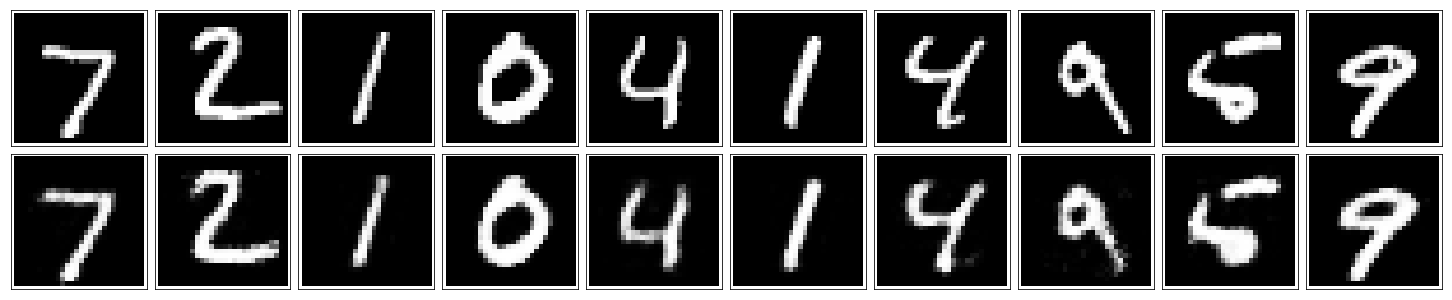

In [344]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed = sess.run([decoded], feed_dict={inputs_: in_imgs})

for r in reconstructed:
    for images, row in zip([in_imgs, r], axes):
        for img, ax in zip(images, row):
            ax.imshow(img.reshape((28,28)), cmap='Greys_r')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [345]:
sess.close()